In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [4]:
file_path = r"C:\Users\tomdo\Desktop\Stats\econometrics\Econometrics_Problem Set 2\Econometrics_Problem-Set-2\nbasal.xls"
df = pd.read_excel(file_path)
df.head()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
0,1,1,1002.5,4,27,4,77,2867,1,0,...,5,19.0,0,37.23,6.91,1,0,16,729,1
1,2,1,2030.0,5,28,4,78,2789,1,0,...,9,28.0,0,35.76,7.62,1,1,25,784,1
2,3,0,650.0,1,25,4,74,1149,0,0,...,0,19.0,0,15.53,6.48,1,0,1,625,0
3,4,0,2030.0,5,28,4,47,1178,0,1,...,2,1.0,0,25.06,7.62,1,0,25,784,0
4,5,0,755.0,3,24,4,82,2096,1,0,...,3,24.0,0,25.56,6.63,1,0,9,576,0


In [6]:
df.describe()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,240.00000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.00000
mean,135.000000,0.442379,1423.827509,5.118959,27.394052,3.717472,65.724907,1682.193309,0.420074,0.408922,...,2.453532,20.20000,0.115242,23.979257,6.952379,0.806691,0.345725,37.721190,761.892193,0.33829
std,77.797815,0.497595,999.774074,3.400062,3.391292,0.754410,18.851110,893.327771,0.494491,0.492551,...,2.148124,18.73582,0.319909,9.731086,0.881428,0.395629,0.476491,46.537021,195.149406,0.47401
min,1.000000,0.000000,150.000000,1.000000,21.000000,0.000000,3.000000,33.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,2.890000,5.010000,0.000000,0.000000,1.000000,441.000000,0.00000
25%,68.000000,0.000000,650.000000,2.000000,25.000000,4.000000,57.000000,983.000000,0.000000,0.000000,...,1.000000,7.00000,0.000000,16.730000,6.480000,1.000000,0.000000,4.000000,625.000000,0.00000
50%,135.000000,0.000000,1186.000000,4.000000,27.000000,4.000000,74.000000,1690.000000,0.000000,0.000000,...,2.000000,14.50000,0.000000,24.820000,7.080000,1.000000,0.000000,16.000000,729.000000,0.00000
75%,202.000000,1.000000,2014.500000,7.000000,30.000000,4.000000,79.000000,2438.000000,1.000000,1.000000,...,3.000000,28.25000,0.000000,33.260000,7.610000,1.000000,1.000000,49.000000,900.000000,1.00000
max,269.000000,1.000000,5740.000000,18.000000,41.000000,4.000000,82.000000,3533.000000,1.000000,1.000000,...,13.000000,139.00000,1.000000,43.090000,8.660000,1.000000,1.000000,324.000000,1681.000000,1.00000


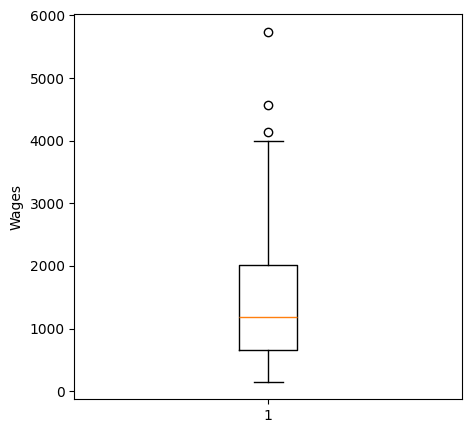

In [15]:
plt.figure(figsize=(5,5)) 
data = df["wage"]
plt.boxplot(data)
plt.ylabel("Wages")
plt.show()

In [22]:
corr_matrix = df.corr()
print(corr_matrix)

                ID      marr      wage     exper       age      coll  \
ID        1.000000  0.059375  0.015450  0.081858  0.087600  0.028609   
marr      0.059375  1.000000  0.158117  0.328272  0.367295 -0.043529   
wage      0.015450  0.158117  1.000000  0.409176  0.342444 -0.105632   
exper     0.081858  0.328272  0.409176  1.000000  0.941165  0.087341   
age       0.087600  0.367295  0.342444  0.941165  1.000000  0.074305   
coll      0.028609 -0.043529 -0.105632  0.087341  0.074305  1.000000   
games    -0.028050  0.069110  0.303766  0.148206  0.126373 -0.014931   
minutes  -0.004794  0.105087  0.563374  0.214265  0.147060 -0.068114   
guard    -0.065082  0.030498 -0.124664 -0.052026 -0.065701  0.069272   
forward   0.078192 -0.025298  0.051110 -0.000191  0.005929 -0.049425   
center   -0.016784 -0.006947  0.096684  0.068450  0.078386 -0.026273   
points   -0.033796  0.123694  0.657027  0.190789  0.104821 -0.120423   
rebounds -0.007444 -0.033022  0.540872  0.163501  0.116512 -0.11

In [24]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [49]:
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        correlation_value = corr_matrix.iloc[i, j]
        
        if abs(correlation_value) > threshold:
            print(f"Columns '{corr_matrix.columns[i]}' and '{corr_matrix.columns[j]}' have a correlation of {correlation_value}")


Columns 'marr' and 'marrblck' have a correlation of 0.8027546757251224
Columns 'wage' and 'lwage' have a correlation of 0.8938394249339148
Columns 'exper' and 'age' have a correlation of 0.941165244761515
Columns 'exper' and 'expersq' have a correlation of 0.9503272713234403
Columns 'exper' and 'agesq' have a correlation of 0.9421283079929575
Columns 'age' and 'expersq' have a correlation of 0.904639233274621
Columns 'age' and 'agesq' have a correlation of 0.9968467719220421
Columns 'minutes' and 'points' have a correlation of 0.8392437935186313
Columns 'minutes' and 'avgmin' have a correlation of 0.9352593799166556
Columns 'points' and 'avgmin' have a correlation of 0.8870204699156884
Columns 'expersq' and 'agesq' have a correlation of 0.9269406835672225


<Axes: >

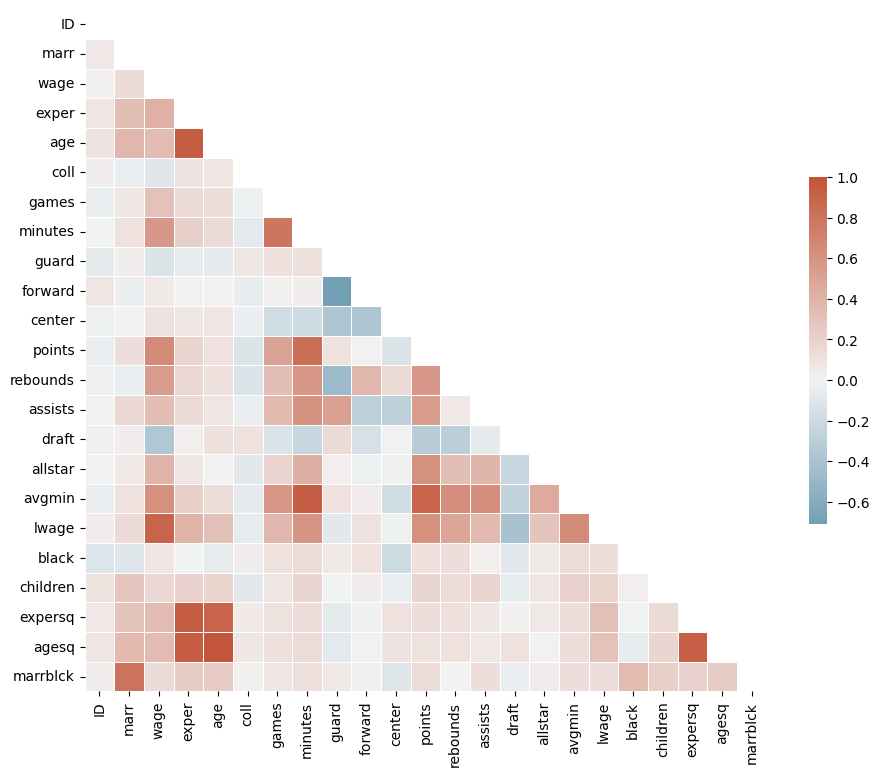

In [48]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='exper', ylabel='wage'>

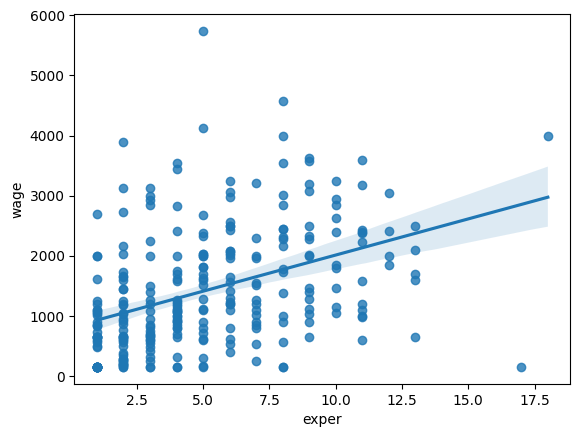

In [52]:
sns.regplot(x=df["exper"],y=df["wage"],data=df)

In [39]:
x, y = df["exper"], df["wage"]

In [40]:
x = sm.add_constant(x)

In [41]:
model = sm.OLS(y, x)

In [42]:
results = model.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     53.69
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.79e-12
Time:                        20:36:43   Log-Likelihood:                -2214.7
No. Observations:                 269   AIC:                             4433.
Df Residuals:                     267   BIC:                             4441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        807.9317    100.847      8.011      0.0